In [4]:
import datetime
import time

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.python.framework.versions
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from lstmgan import *
import datetime as dt

# Metrics to look at
# Time to run complete script, and memory performance
# Run prediction on all customers


ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Users\marti\anaconda3\lib\site-packages\tensorflow\python\eager\context.py)

In [15]:
learning_rate = 0.00001
epochs = 100
batch_size = 512
lstmgan = LSTMGAN(epochs = epochs, learning_rate=learning_rate)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 8, 512)           528384    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 8, 512)            0         
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8, 512)            0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)              

In [16]:
start_time = time.perf_counter_ns()
g_loss, d_loss, accuracy = lstmgan.train(epochs=epochs, batch_size=batch_size, save_interval=10)
end_time = time.perf_counter_ns()
time_formatted = str(dt.timedelta(seconds=(end_time - start_time) * 10**(-9))) # gives time in hh:mm:ss

print(f"Trained the model in {time_formatted}")

2022-06-06 00:33:59 0 [D loss: 2.442518, acc.: 50.00%] [G loss: 0.984820]
2022-06-06 00:34:56 1 [D loss: 2.011174, acc.: 50.00%] [G loss: 0.976086]
2022-06-06 00:35:52 2 [D loss: 1.840963, acc.: 50.00%] [G loss: 0.965339]
2022-06-06 00:36:47 3 [D loss: 1.757161, acc.: 50.00%] [G loss: 0.941257]
2022-06-06 00:37:38 4 [D loss: 1.680430, acc.: 50.00%] [G loss: 0.870041]
2022-06-06 00:38:29 5 [D loss: 1.678575, acc.: 49.71%] [G loss: 0.600318]
2022-06-06 00:39:19 6 [D loss: 1.815627, acc.: 34.77%] [G loss: 0.388352]
2022-06-06 00:40:09 7 [D loss: 1.700267, acc.: 46.58%] [G loss: 0.527741]
2022-06-06 00:40:58 8 [D loss: 1.618813, acc.: 47.85%] [G loss: 0.591484]
2022-06-06 00:41:48 9 [D loss: 1.545586, acc.: 49.71%] [G loss: 0.662104]
2022-06-06 00:42:37 10 [D loss: 1.504798, acc.: 49.90%] [G loss: 0.648919]
2022-06-06 00:43:26 11 [D loss: 1.467049, acc.: 49.90%] [G loss: 0.643802]
2022-06-06 00:44:16 12 [D loss: 1.409832, acc.: 49.80%] [G loss: 0.635849]
2022-06-06 00:45:16 13 [D loss: 1.3

In [6]:
run_and_plot(learning_rate, batch_size, epochs)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 8, 512)           528384    
 nal)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 8, 512)            0         
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 8, 512)            0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 512)              

ValueError: Found input variables with inconsistent numbers of samples: [4464, 2]

Now that we have trained the model, lets look at the accuracy


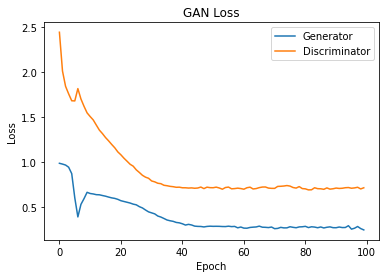

In [24]:
plt.plot(g_loss)
plt.plot(d_loss)
plt.title('GAN Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Generator', 'Discriminator'], loc='upper right')
plt.show()

Comparing generated data vs real data

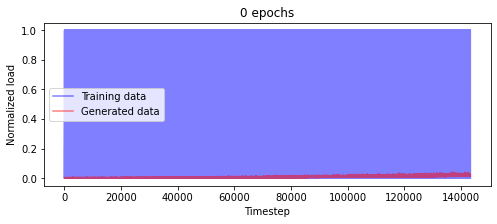

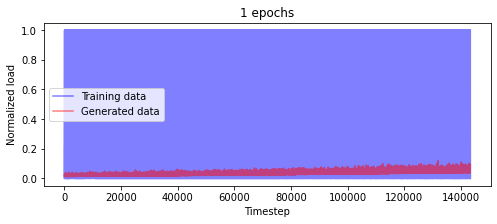

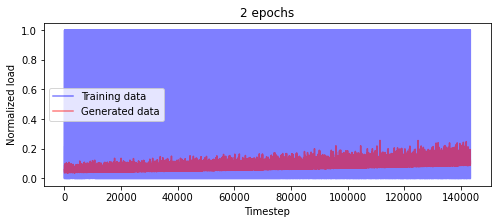

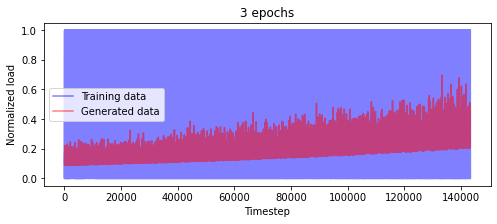

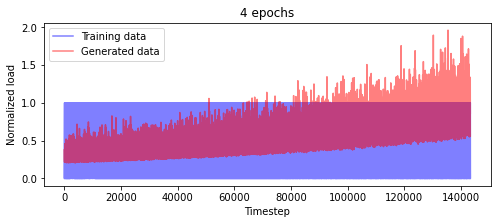

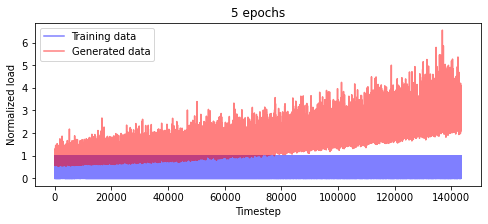

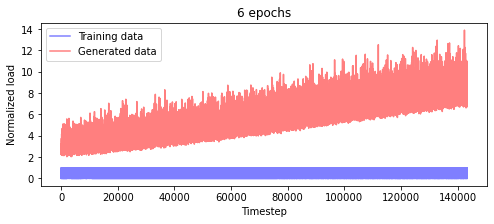

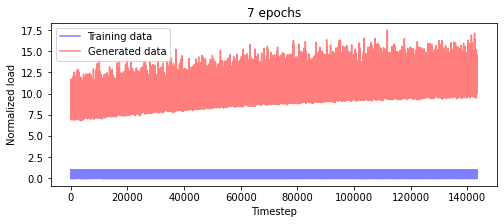

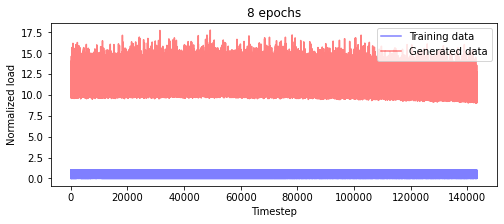

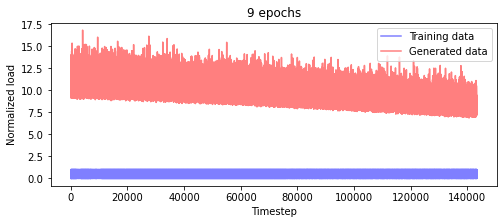

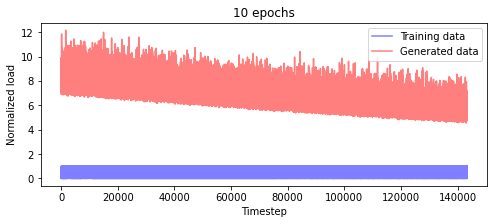

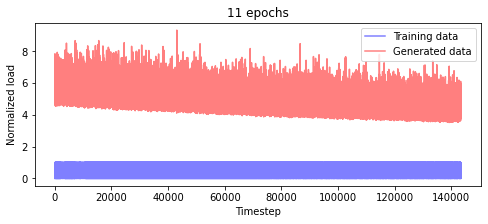

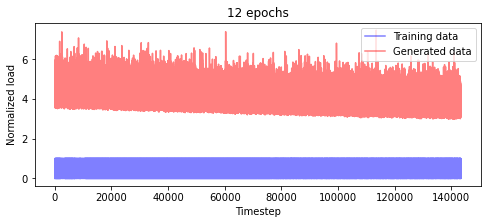

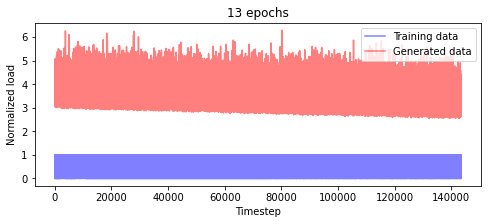

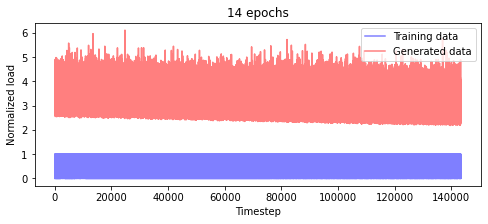

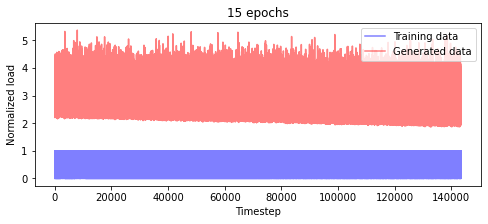

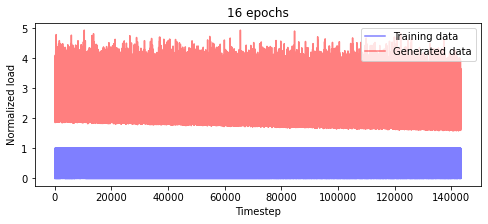

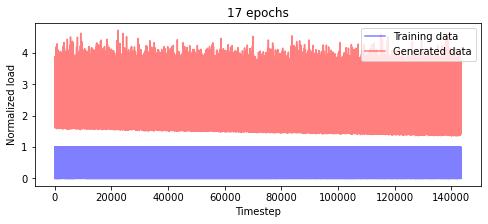

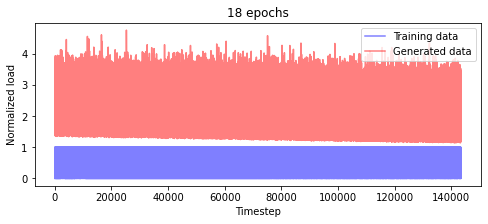

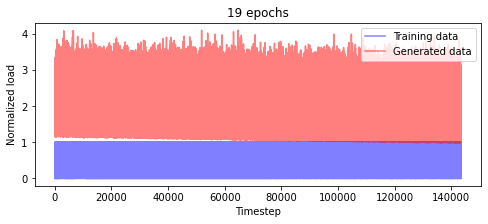

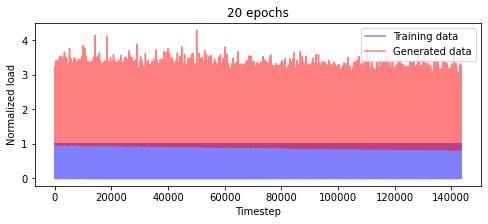

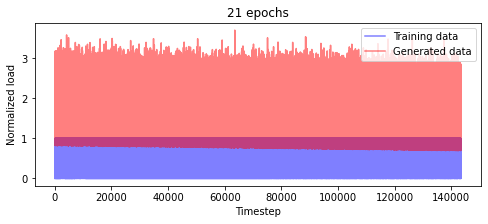

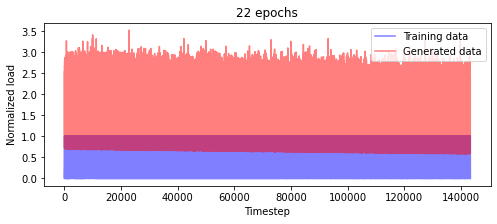

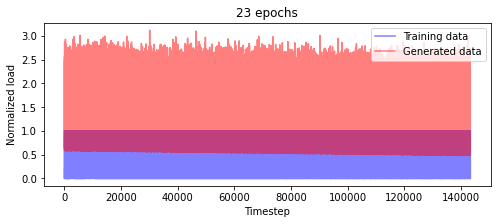

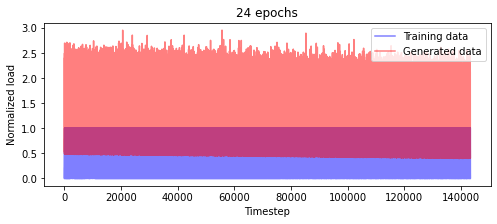

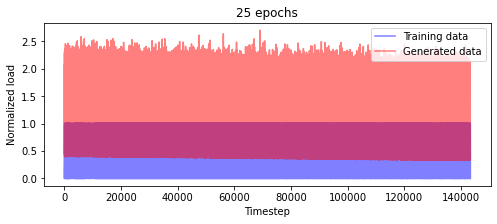

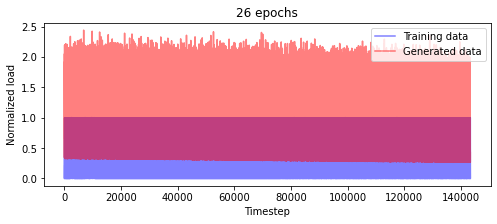

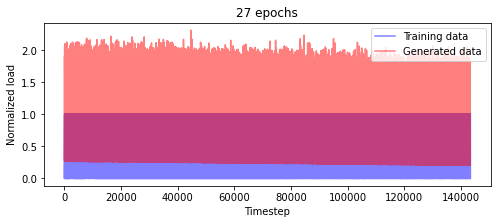

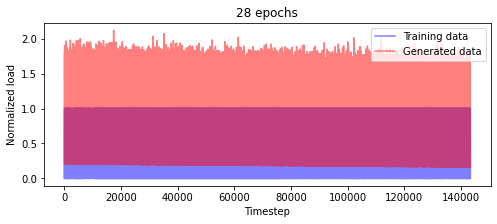

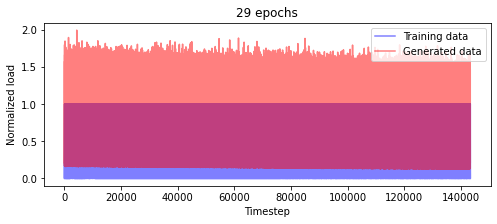

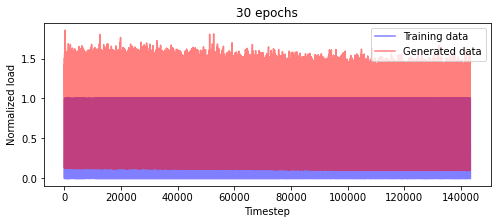

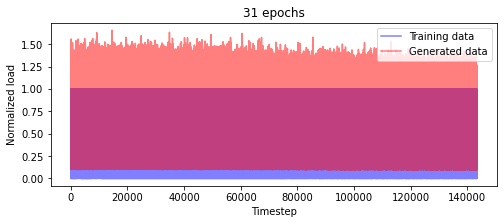

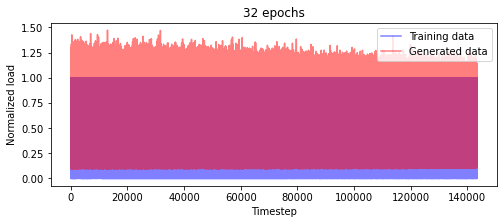

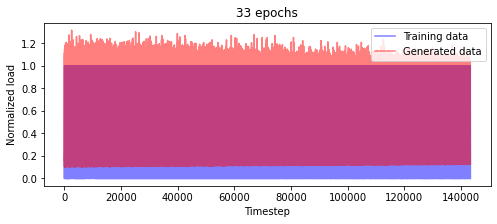

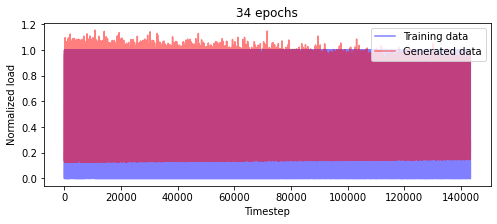

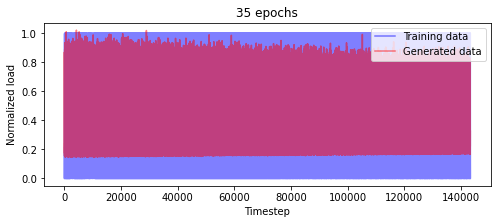

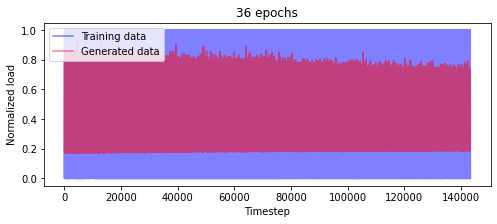

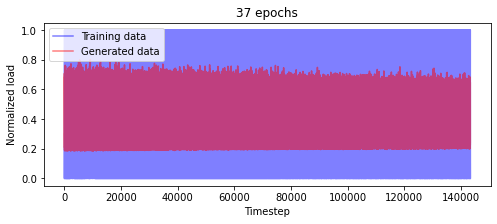

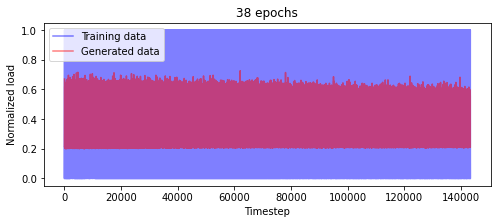

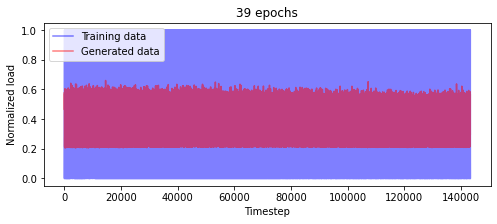

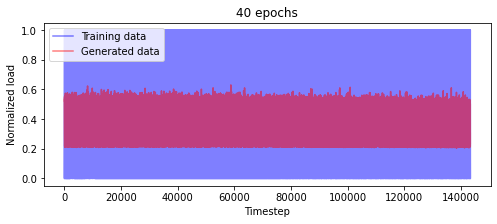

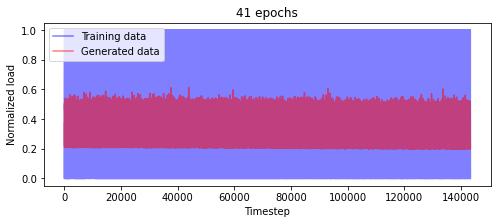

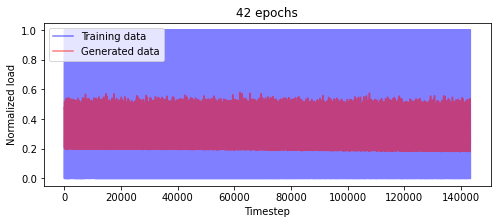

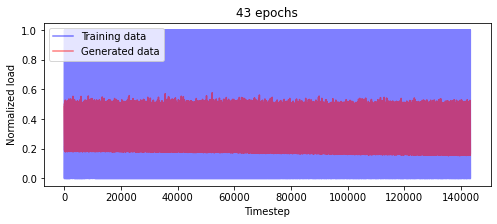

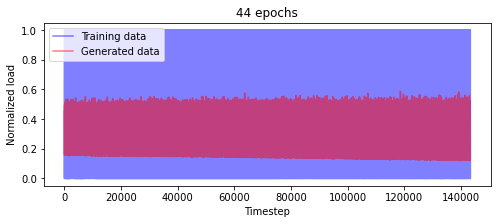

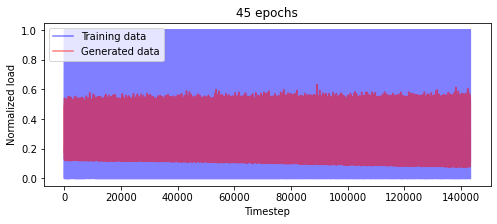

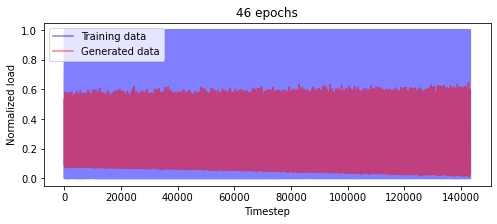

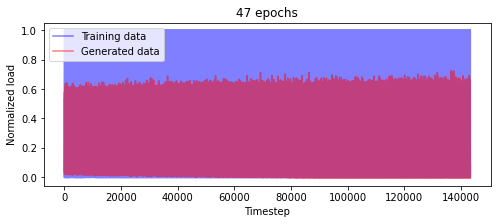

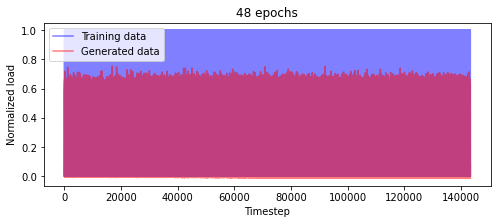

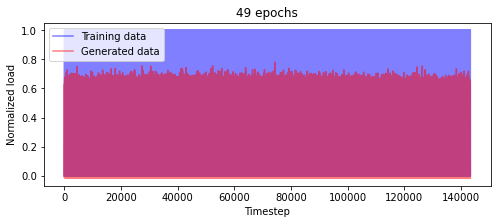

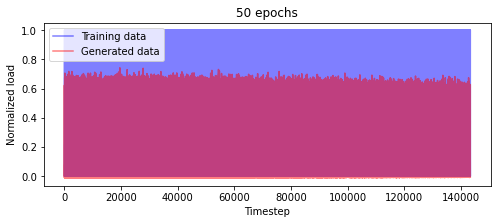

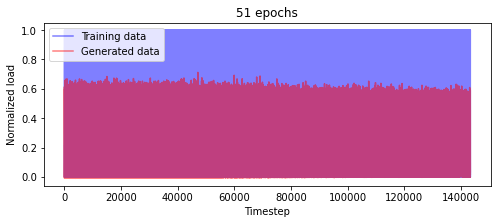

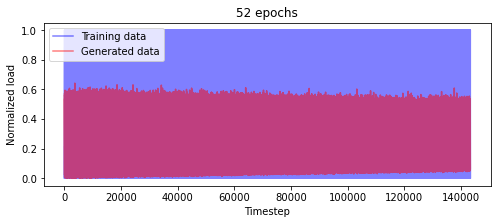

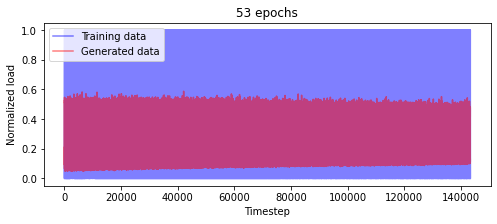

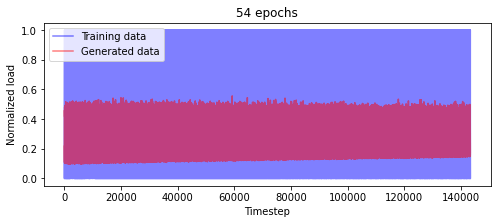

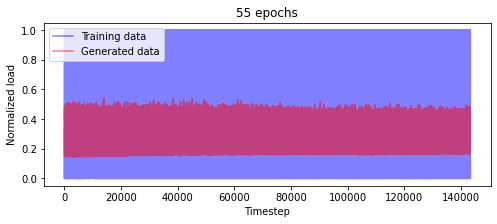

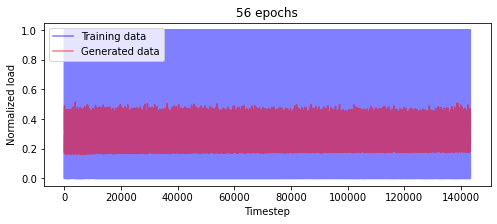

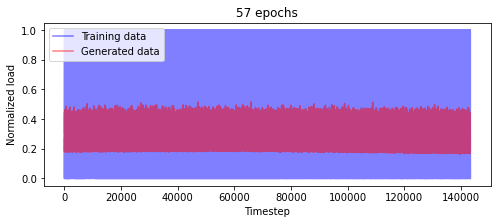

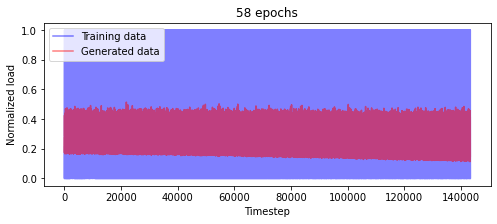

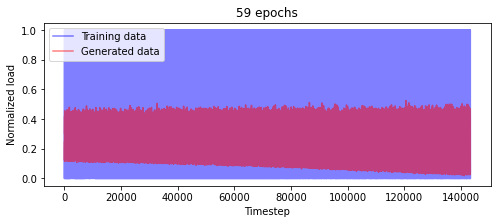

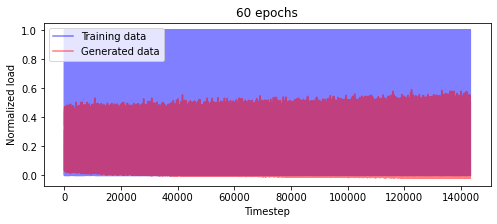

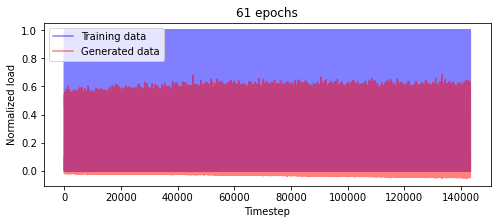

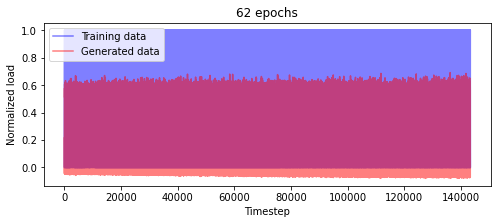

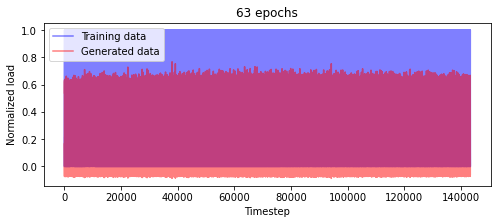

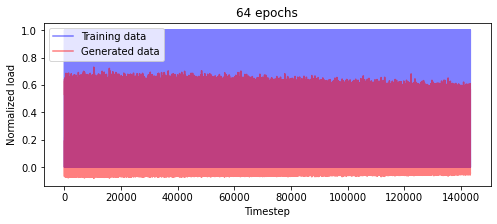

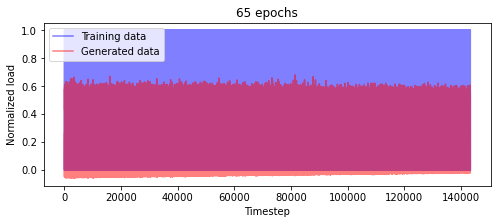

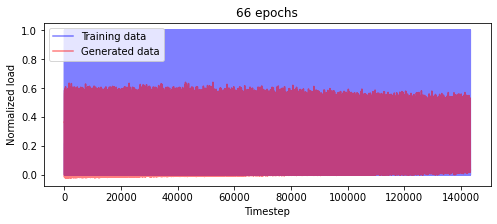

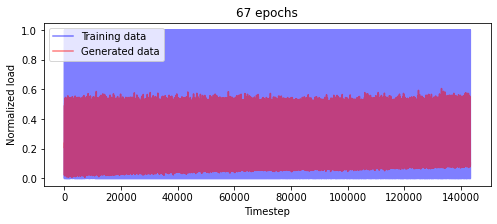

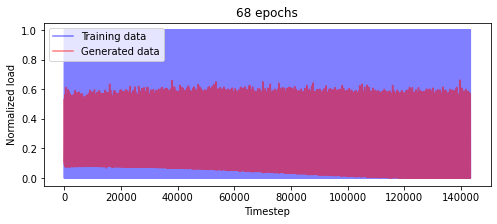

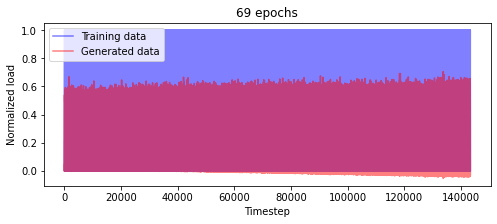

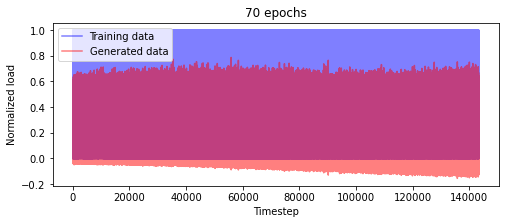

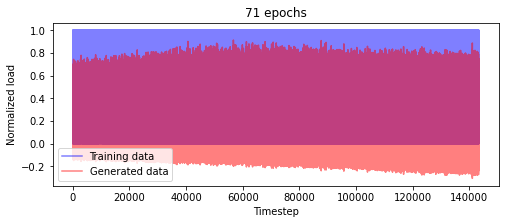

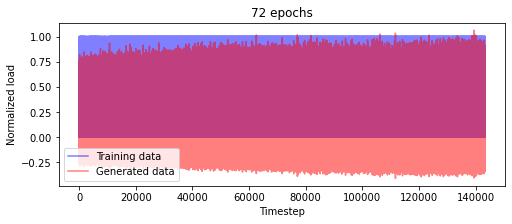

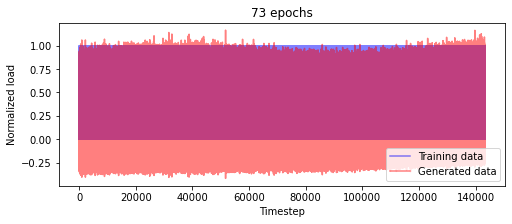

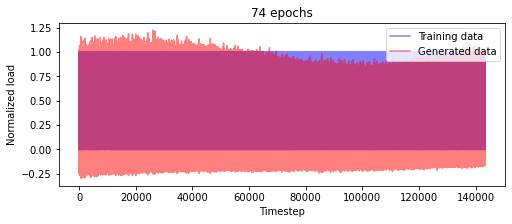

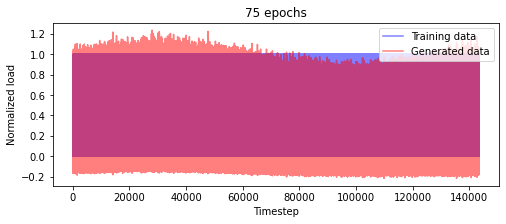

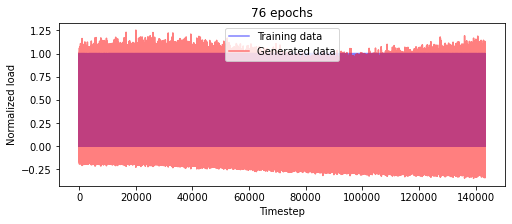

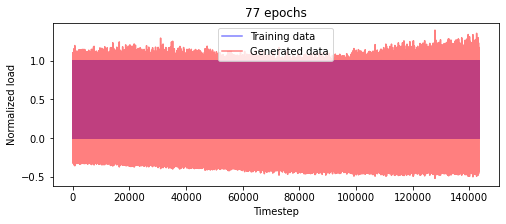

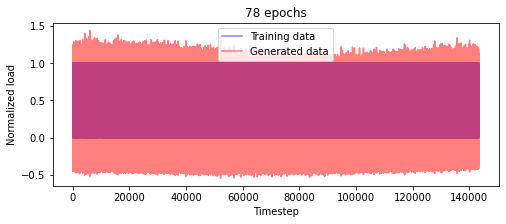

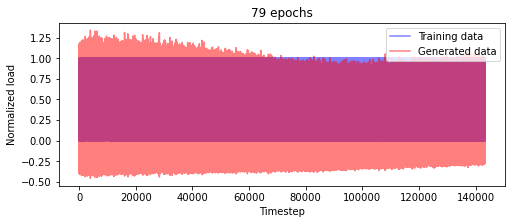

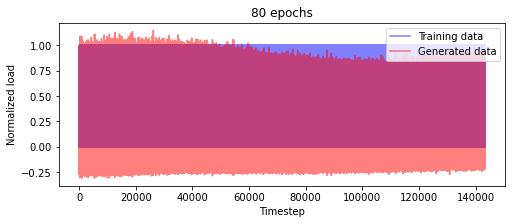

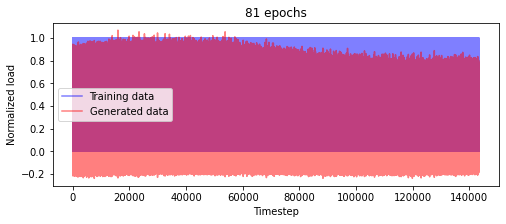

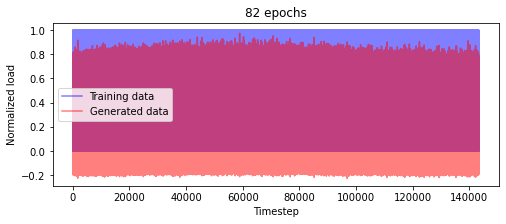

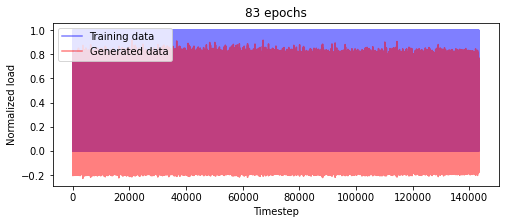

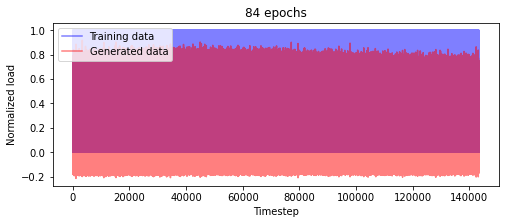

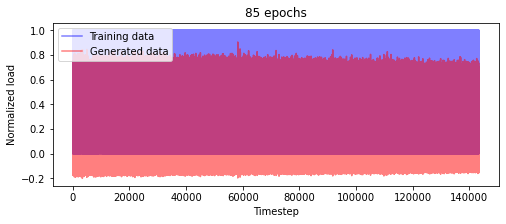

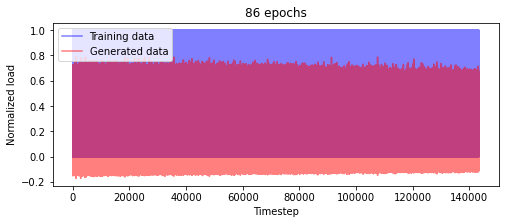

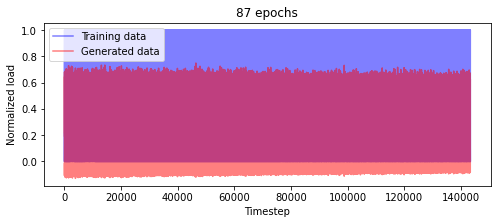

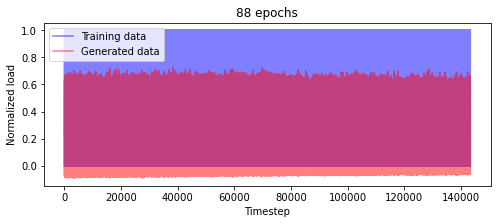

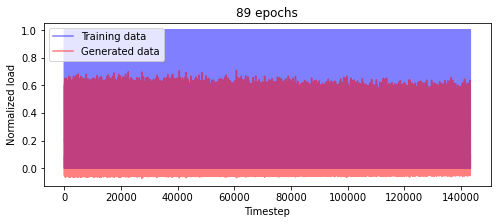

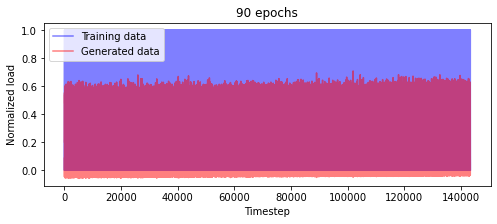

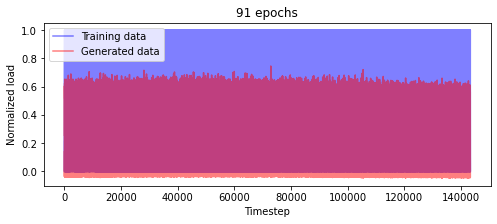

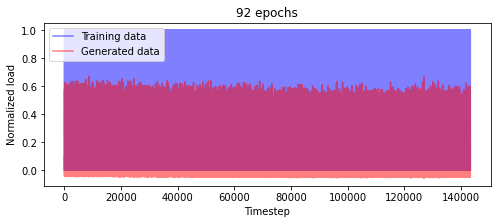

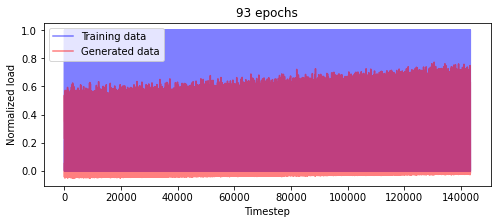

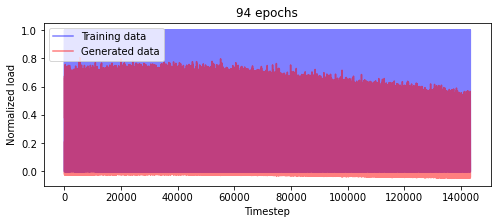

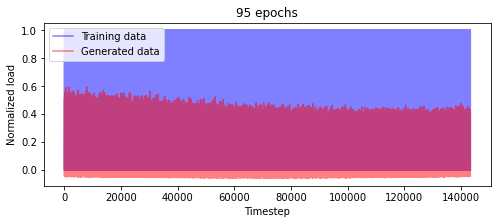

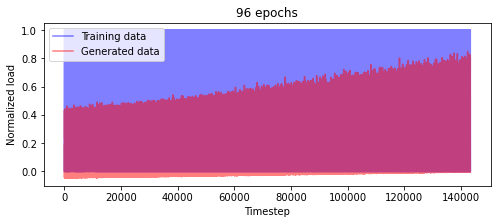

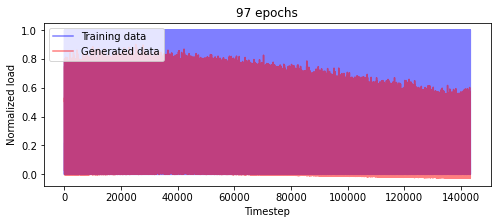

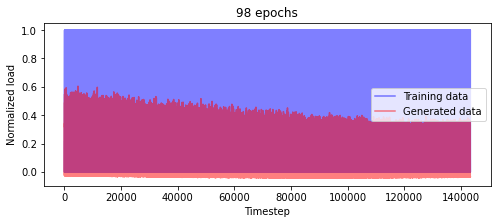

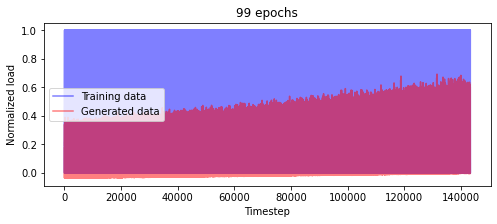

In [25]:
for i in range(0, lstmgan.epochs, 1):
    y_gen = lstmgan.generated_data[i]#[-1000:]
    x_gen = range(len(y_gen))

    y = lstmgan.training_data[i]#[-1000:]
    x = range(len(y))

    fig = plt.figure(figsize=(8,3))
    plt.plot(x, y, 'b', label='Training data', alpha=0.5)
    plt.plot(x_gen, y_gen, 'r', label='Generated data', alpha=0.5)

    plt.xlabel('Timestep')
    plt.ylabel('Normalized load')
    plt.title(f'{i} epochs')
    plt.legend()
    plt.show()
    fig.savefig(f'{i}_epochs_train_vs_gen.png')



Comparing rolling average of generated data vs real data

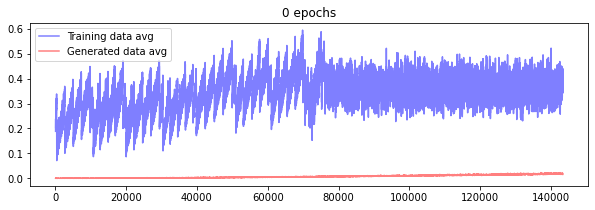

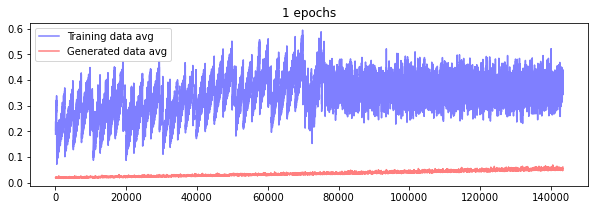

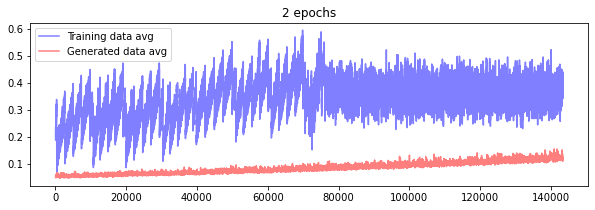

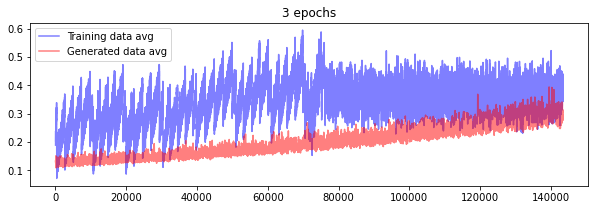

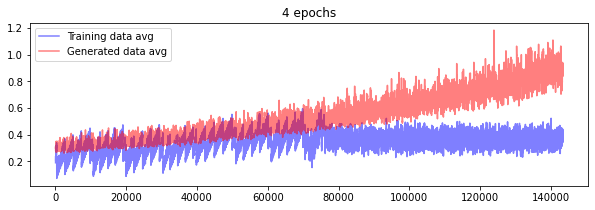

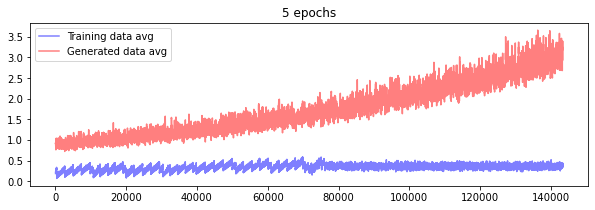

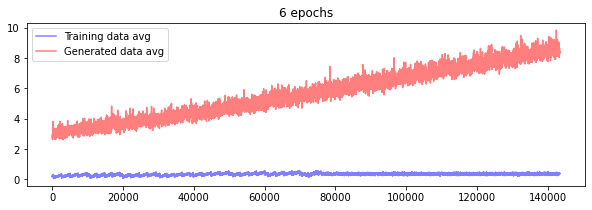

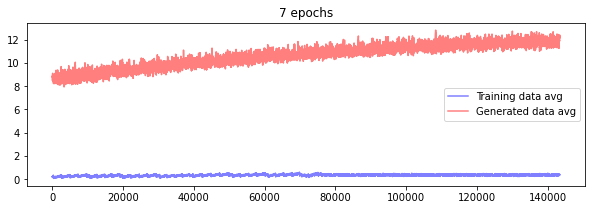

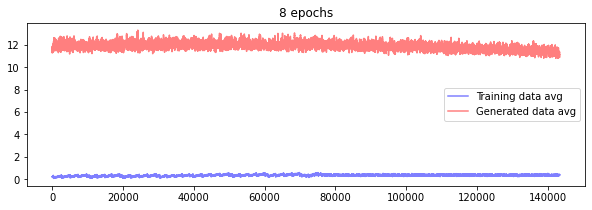

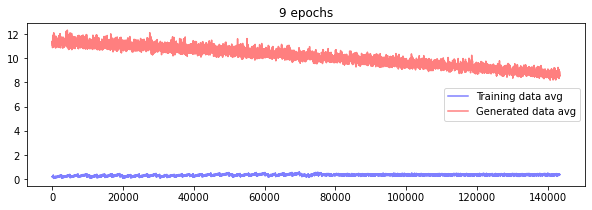

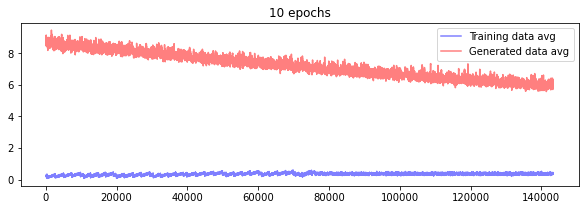

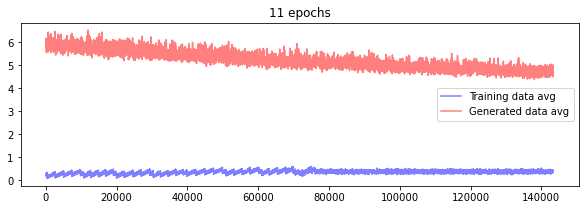

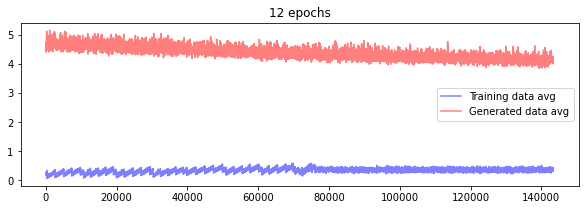

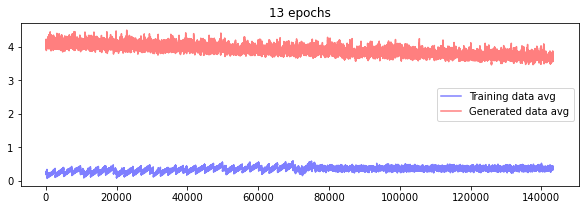

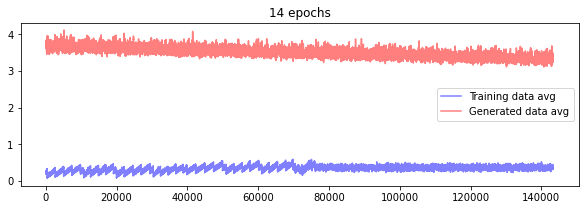

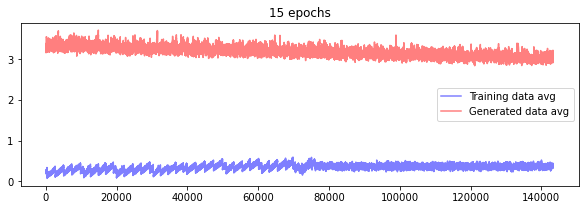

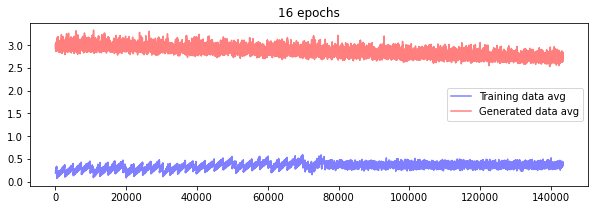

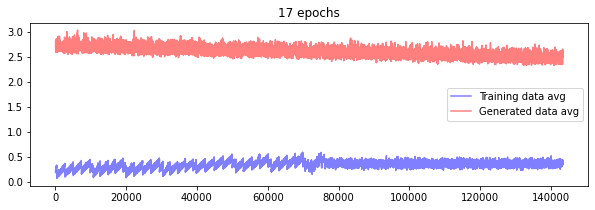

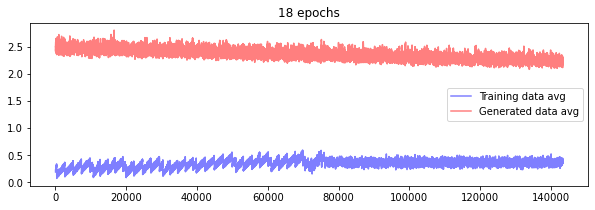

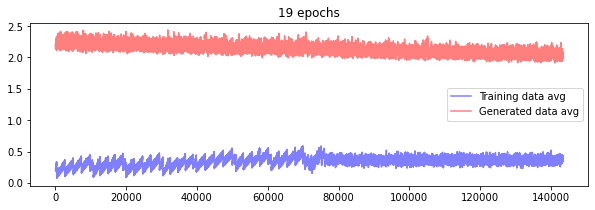

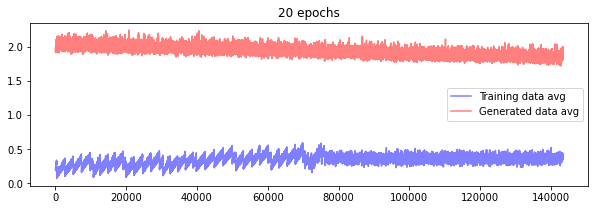

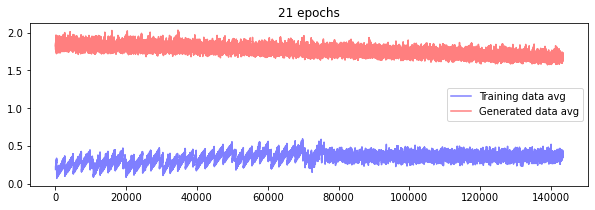

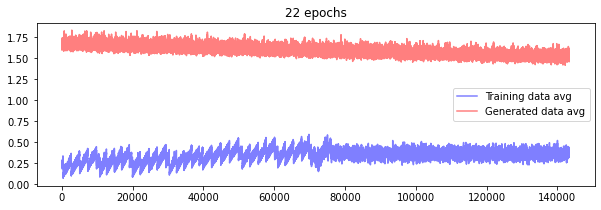

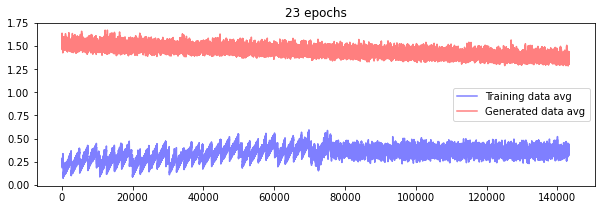

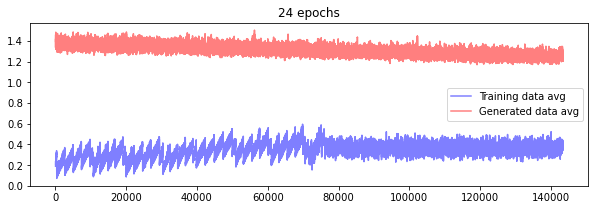

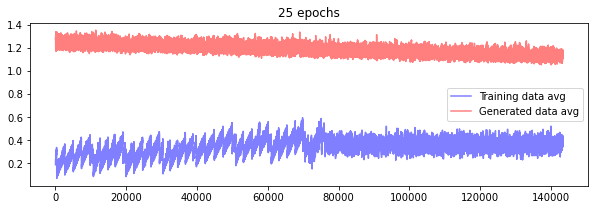

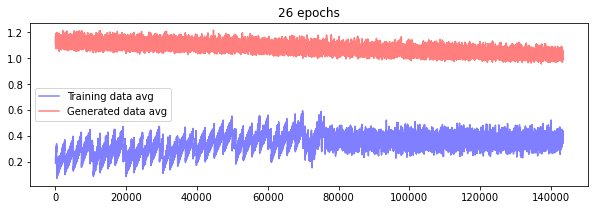

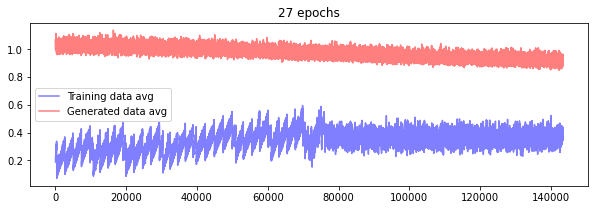

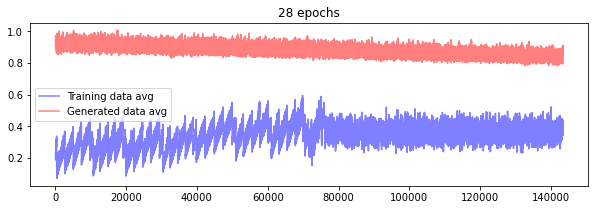

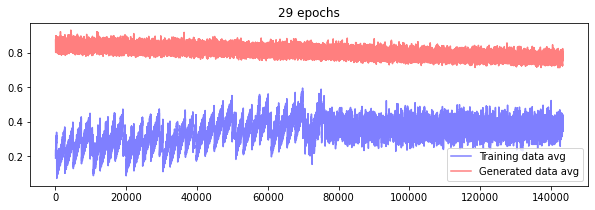

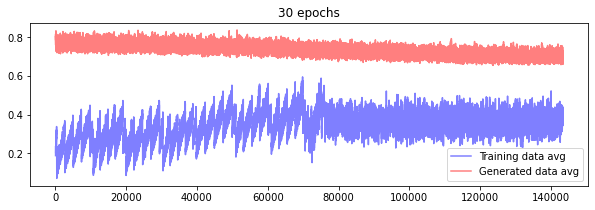

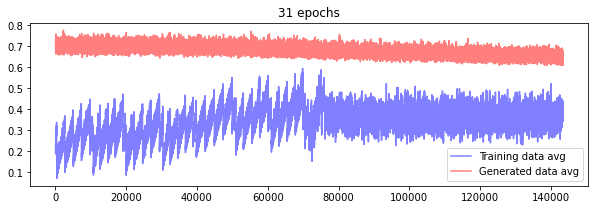

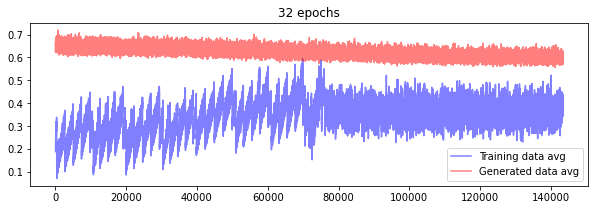

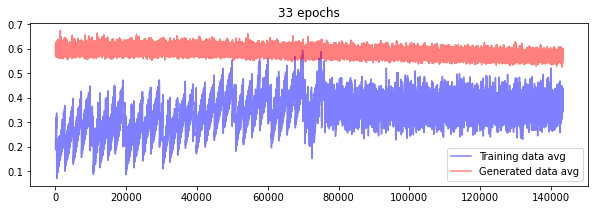

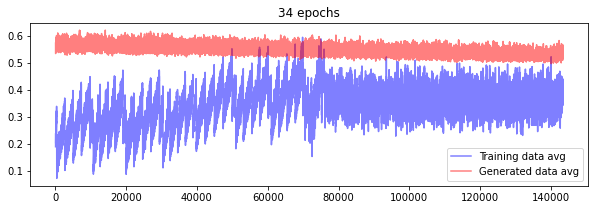

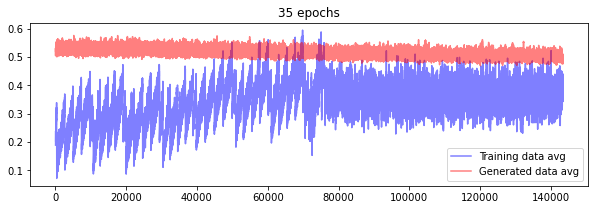

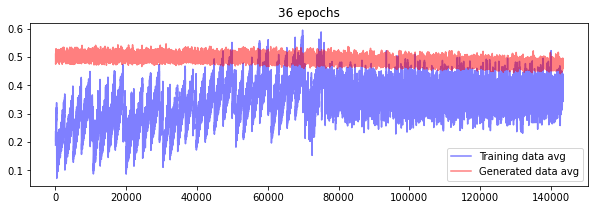

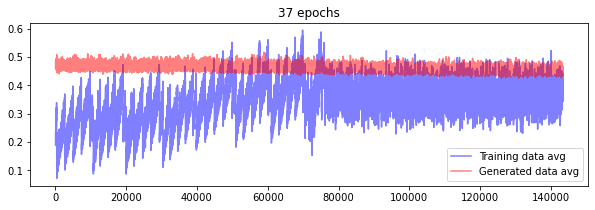

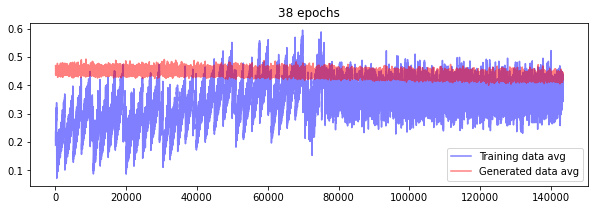

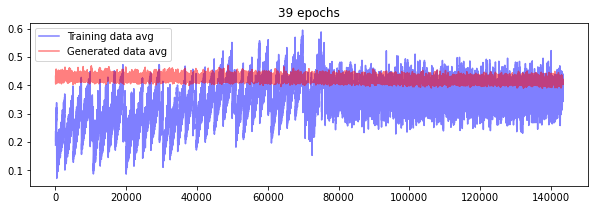

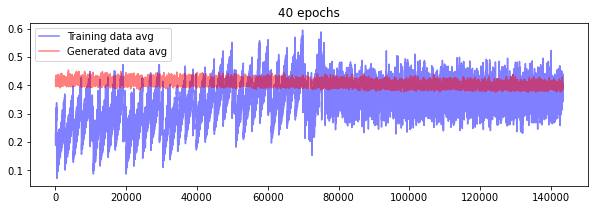

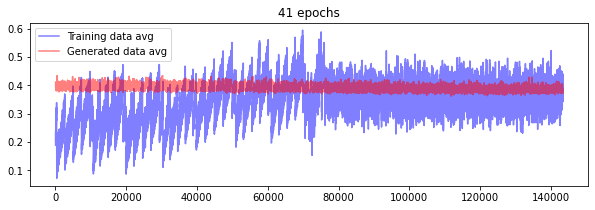

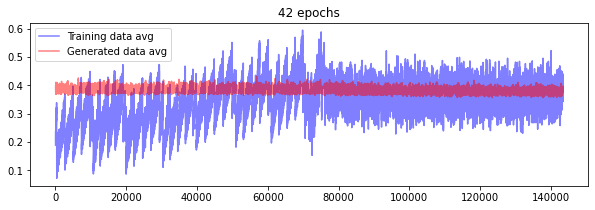

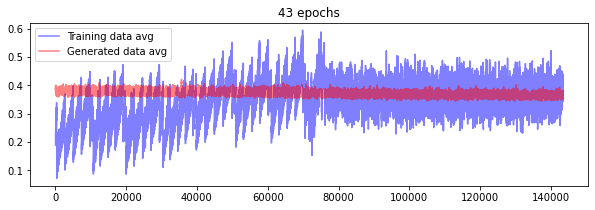

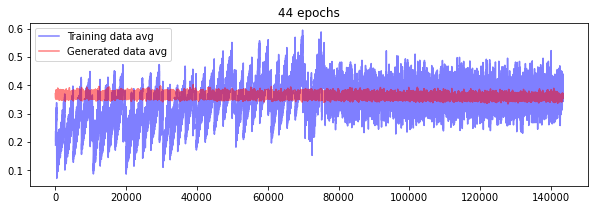

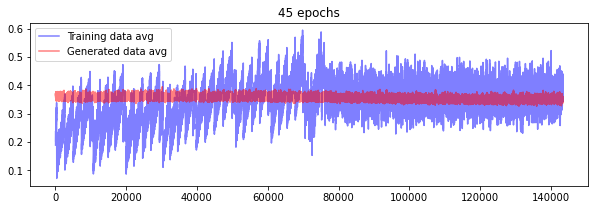

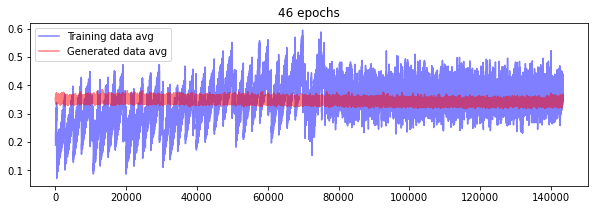

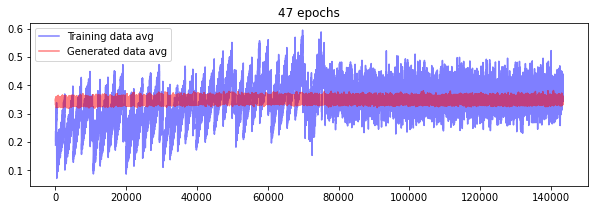

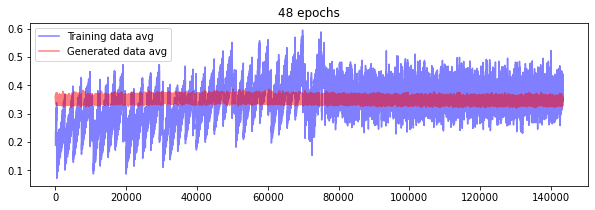

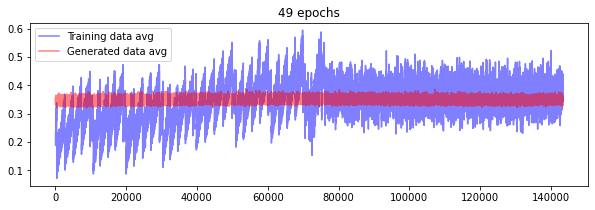

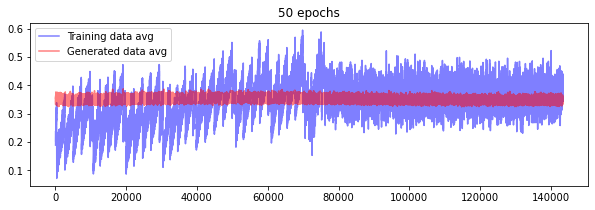

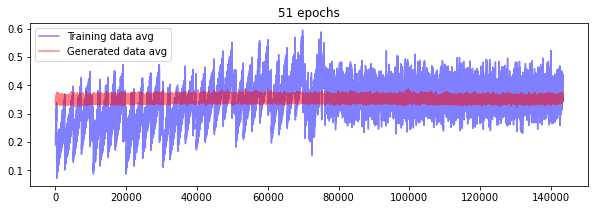

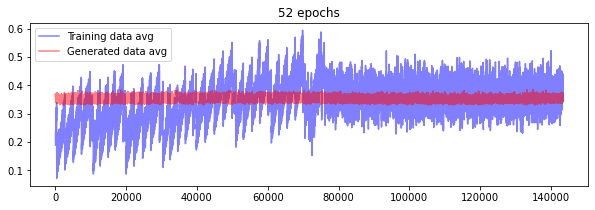

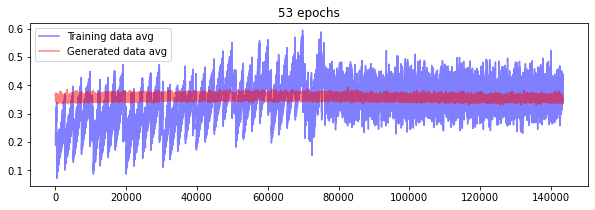

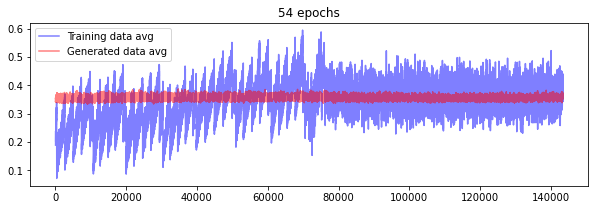

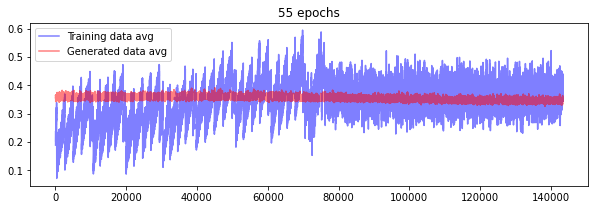

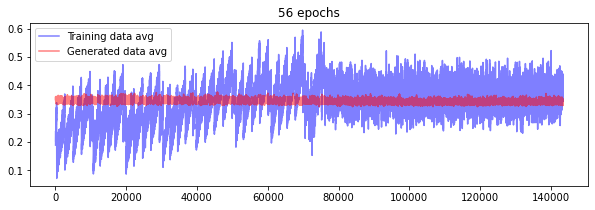

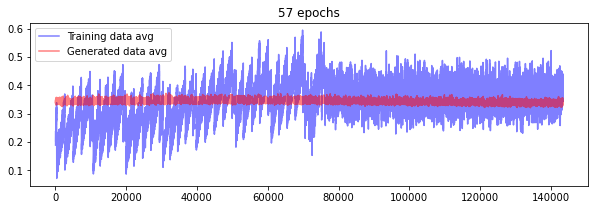

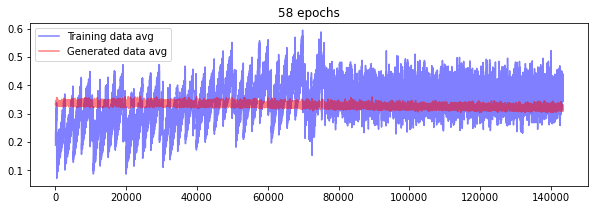

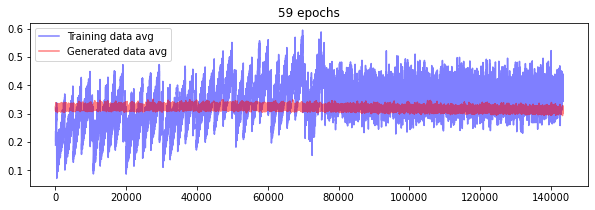

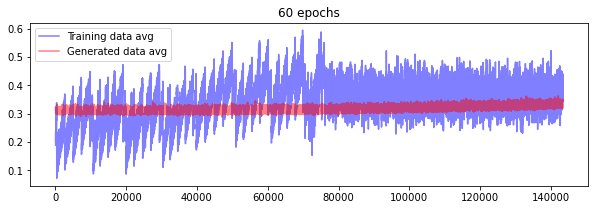

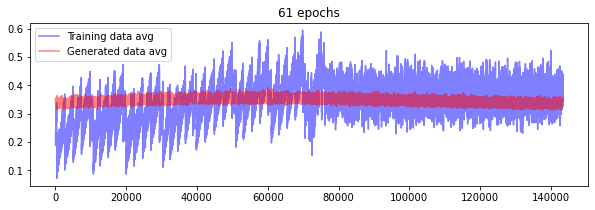

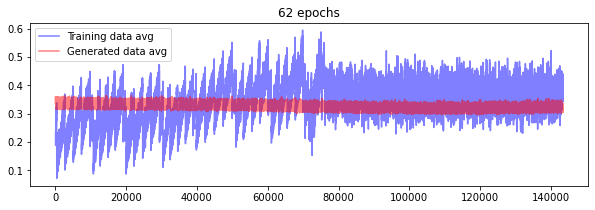

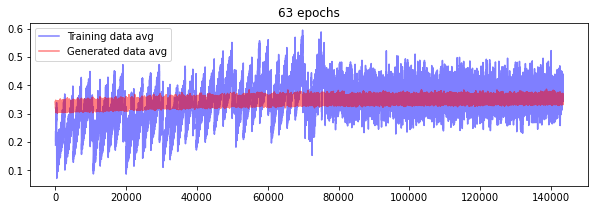

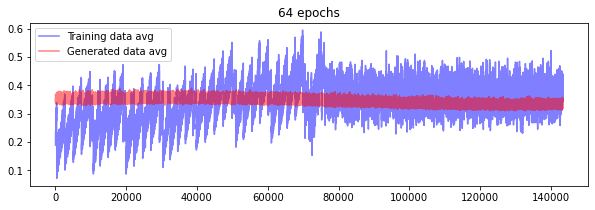

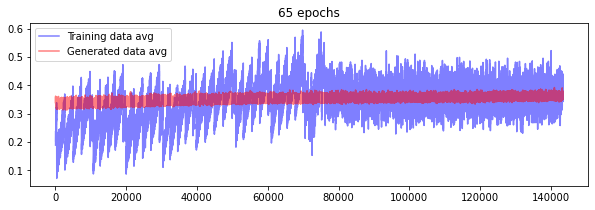

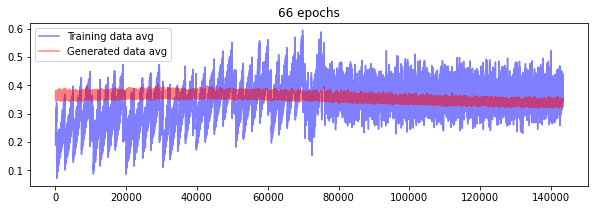

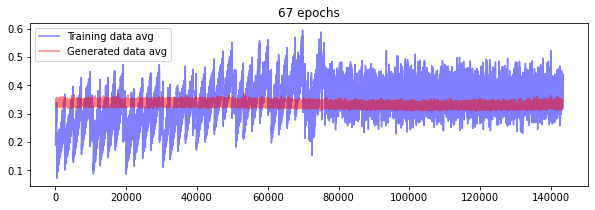

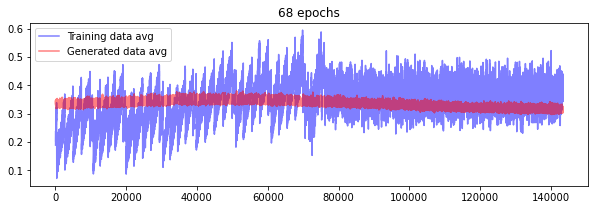

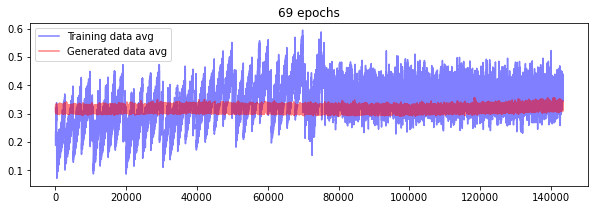

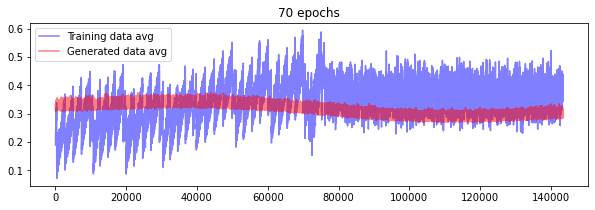

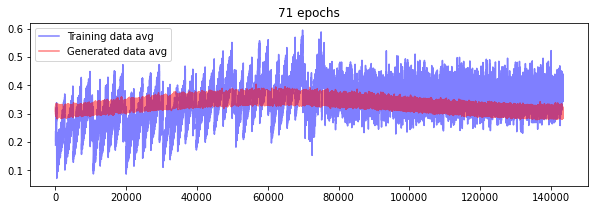

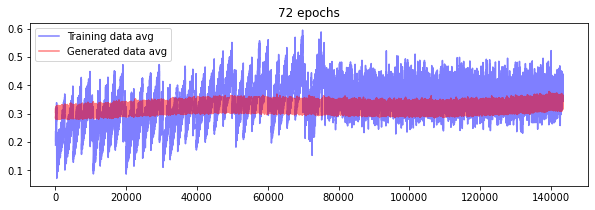

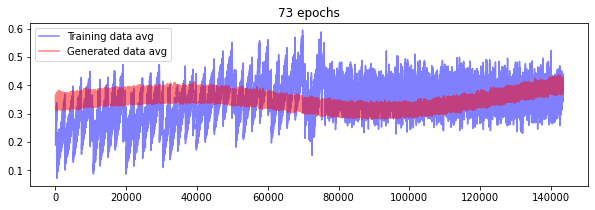

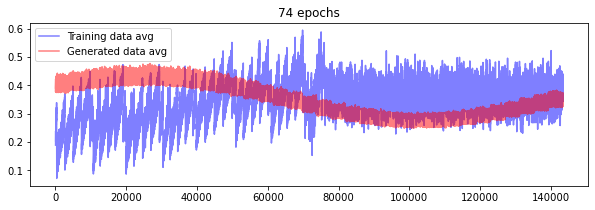

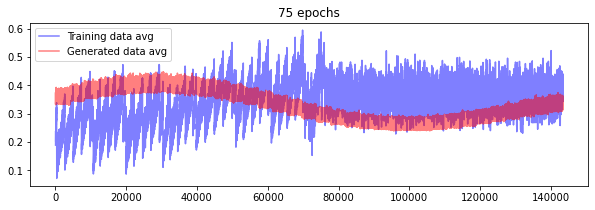

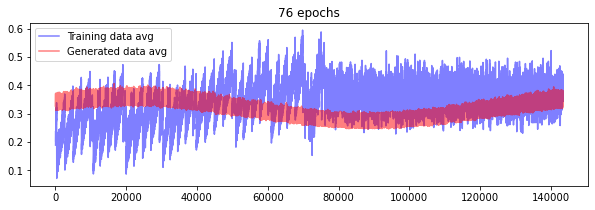

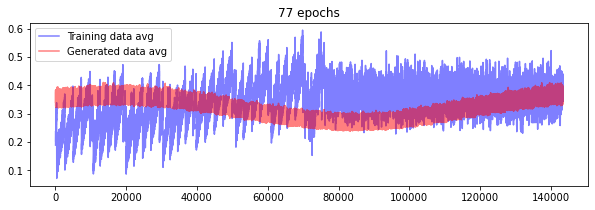

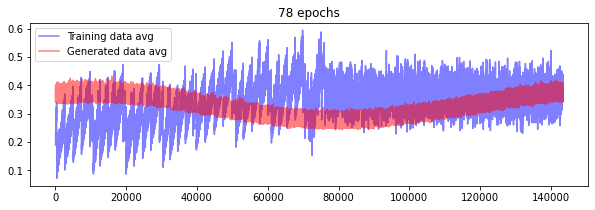

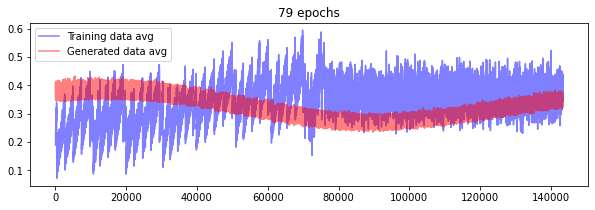

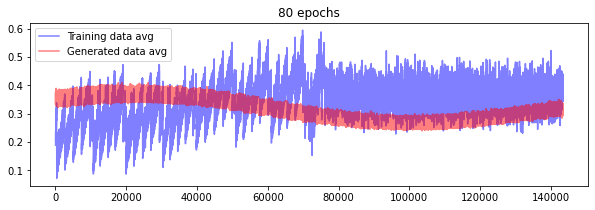

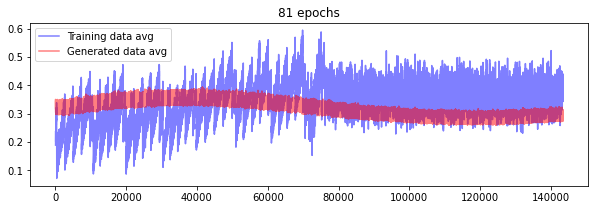

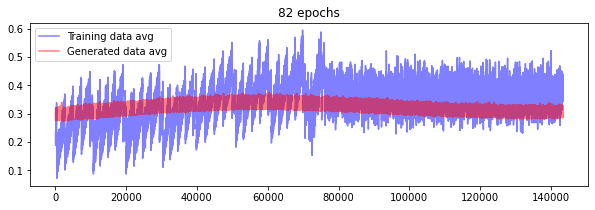

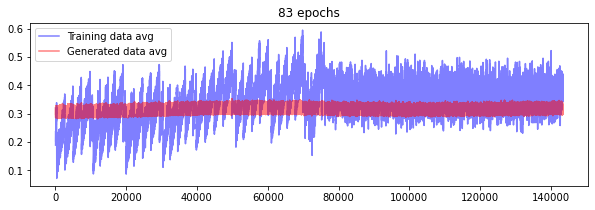

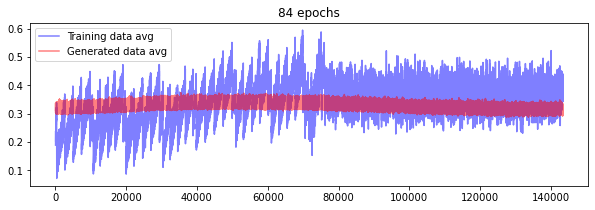

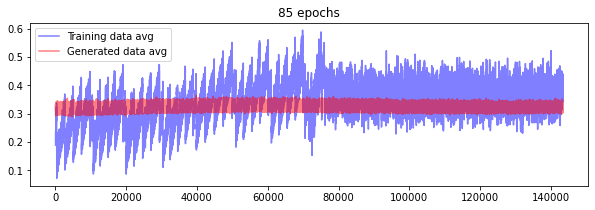

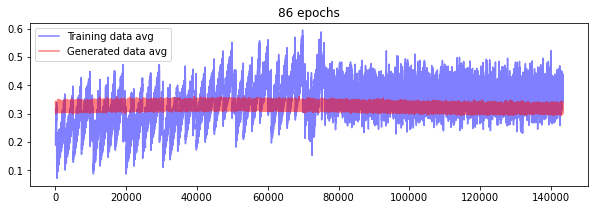

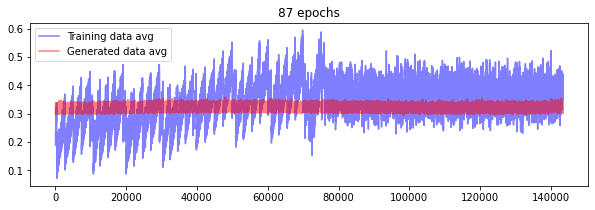

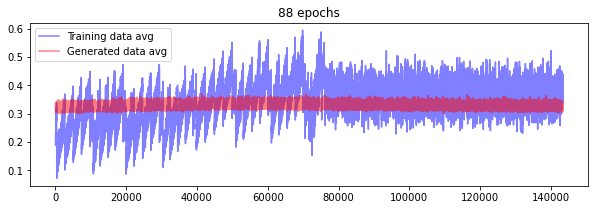

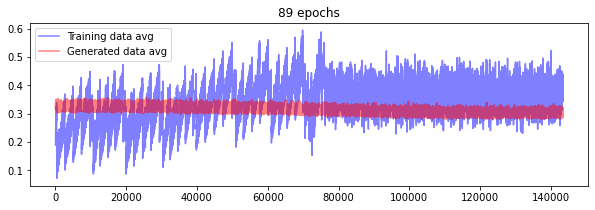

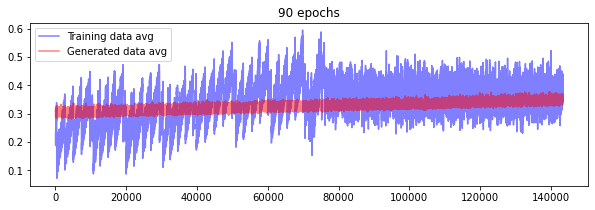

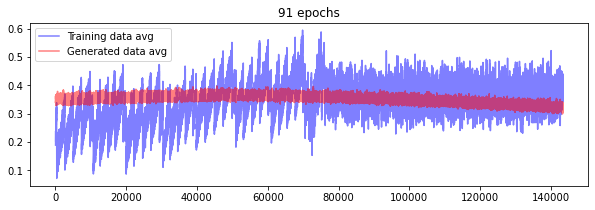

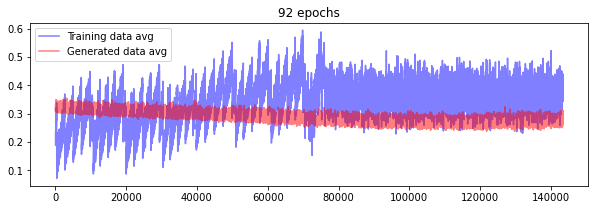

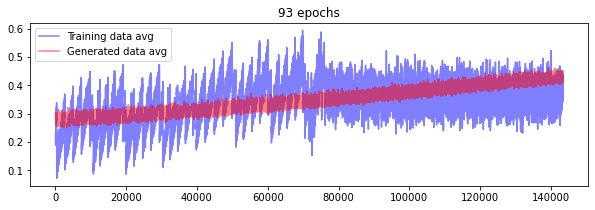

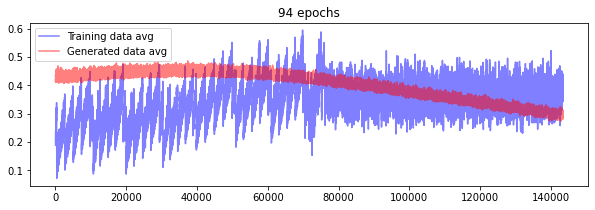

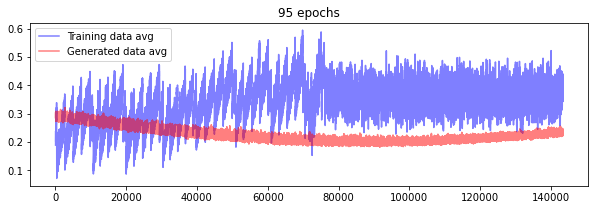

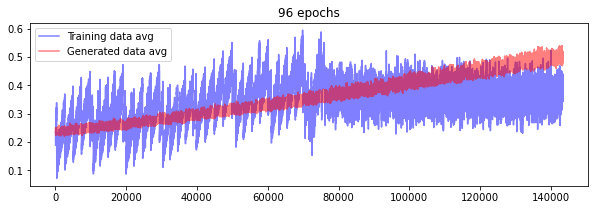

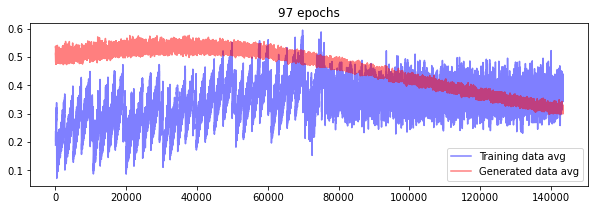

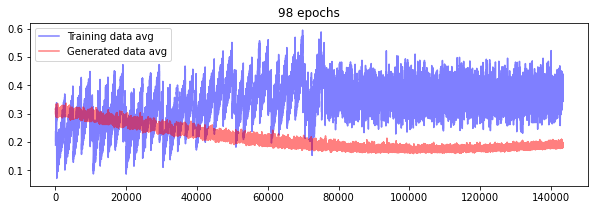

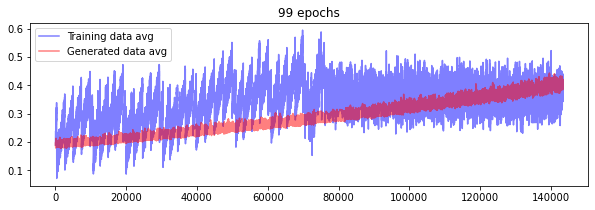

In [26]:
for i in range(0, lstmgan.epochs, 1):

    y_gen = lstmgan.generated_average[i]
    x_gen = range(len(y_gen))

    y = lstmgan.training_average[i]
    x = range(len(y))

    fig = plt.figure(figsize=(10,3))
    plt.plot(x, y, 'b', label='Training data avg', alpha=0.5)
    plt.plot(x_gen, y_gen, 'r', label='Generated data avg', alpha=0.5)
    plt.title(f'{i} epochs')
    plt.legend()
    plt.show()
    fig.savefig(f'{i}_epochs_train_vs_gen_averages.png')

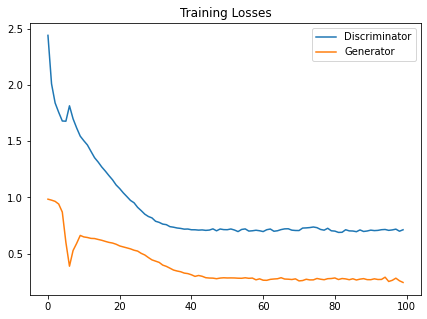

In [27]:
fig = plt.figure(figsize=(7,5))
plt.plot(d_loss, label='Discriminator')
plt.plot(g_loss, label='Generator')
plt.title("Training Losses")
plt.legend()
fig.savefig('training_loss.png')

Made predictions in 0:00:03.741111


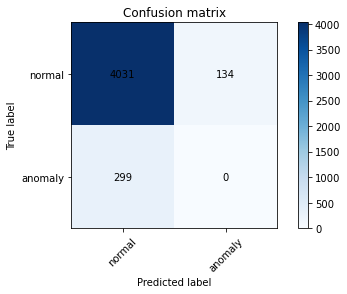

In [29]:
_, y_train, x_test, y_test = load_data()
start_time = time.perf_counter_ns()
y_pred, result_df = anomaly_detection(x_test, y_test, lstmgan.batch_size, lstmgan.discriminator)
end_time = time.perf_counter_ns()
time_formatted = str(dt.timedelta(seconds=(end_time - start_time) * 10**(-9))) # gives time in hh:mm:ss

print(f"Made predictions in {time_formatted}")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

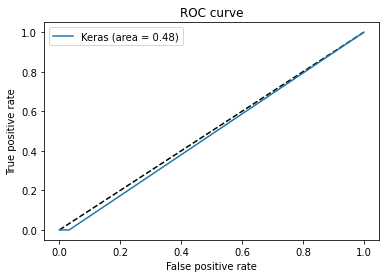

In [30]:
plot_roc_curve(y_test, y_pred)

In [35]:
acc_score, precision, recall, f1 = evaluation(y_test, y_pred)
acc_score, precision, recall, f1

(0.9030017921146953, 0.0, 0.0, 0.0)

In [39]:
index_list = y_test.index.values.tolist()
index_list = np.array(index_list, dtype=np.int64)

df_load = pd.read_csv(f'{data_path}anomaly_labeled_dataset.csv' ,index_col=0)
df = df_load[df_load['monthofyear'] == 7]
df = df[df['year'] == 2012]
# df = df[(df['dayofmonth'] >=1) & (df['dayofmonth'] <= 7)]

test_rows = df.loc[index_list]
test_rows

costumer                   GC  hourofday  minuteofhour  dayofweek  \
263184       202            0.0360000          0             0          6   
263185       202            0.0360000          0            30          6   
263186       202            0.0280000          1             0          6   
263187       202            0.0430000          1            30          6   
263188       202            0.0280000          2             0          6   
...          ...                  ...        ...           ...        ...   
334843       215            0.2870000         21            30          1   
334844       215            0.2150000         22             0          1   
334845       215            0.0830000         22            30          1   
334846       215            0.0380000         23             0          1   
334847       215            0.0820000         23            30          1   

        dayofmonth  monthofyear  year  Anomaly  
263184           1            7  2012        0  
263185           1            7  2012        0  
263186           1            7  2012        0  
263187           1            7  2012        0  
263188           1            7  2012        0  
...            ...          ...   ...      ...  
334843          31            7  2012        0  
334844          31            7  2012        0  
334845          31            7  2012        0  
334846          31            7  2012        0  
334847          31            7  2012        0  

[4464 rows x 9 columns]

In [37]:
test_rows['timestamp'] = test_rows['year'].astype(str) + '-' + test_rows['monthofyear'].astype(str) + '-' + test_rows['dayofmonth'].astype(str) + 'T' + test_rows['hourofday'].astype(str) + ':' + test_rows['minuteofhour'].astype(str) + ':00'
test_rows['timestamp'] = pd.to_datetime(test_rows['timestamp'])
test_rows['Anomaly'] = y_pred
test_rows

costumer                   GC  hourofday  minuteofhour  dayofweek  \
263184       202            0.0360000          0             0          6   
263185       202            0.0360000          0            30          6   
263186       202            0.0280000          1             0          6   
263187       202            0.0430000          1            30          6   
263188       202            0.0280000          2             0          6   
...          ...                  ...        ...           ...        ...   
334843       215            0.2870000         21            30          1   
334844       215            0.2150000         22             0          1   
334845       215            0.0830000         22            30          1   
334846       215            0.0380000         23             0          1   
334847       215            0.0820000         23            30          1   

        dayofmonth  monthofyear  year              Anomaly           timestamp  
263184           1            7  2012            0.0000000 2012-07-01 00:00:00  
263185           1            7  2012            0.0000000 2012-07-01 00:30:00  
263186           1            7  2012            0.0000000 2012-07-01 01:00:00  
263187           1            7  2012            0.0000000 2012-07-01 01:30:00  
263188           1            7  2012            0.0000000 2012-07-01 02:00:00  
...            ...          ...   ...                  ...                 ...  
334843          31            7  2012            0.0000000 2012-07-31 21:30:00  
334844          31            7  2012            0.0000000 2012-07-31 22:00:00  
334845          31            7  2012            0.0000000 2012-07-31 22:30:00  
334846          31            7  2012            0.0000000 2012-07-31 23:00:00  
334847          31            7  2012            0.0000000 2012-07-31 23:30:00  

[4464 rows x 10 columns]

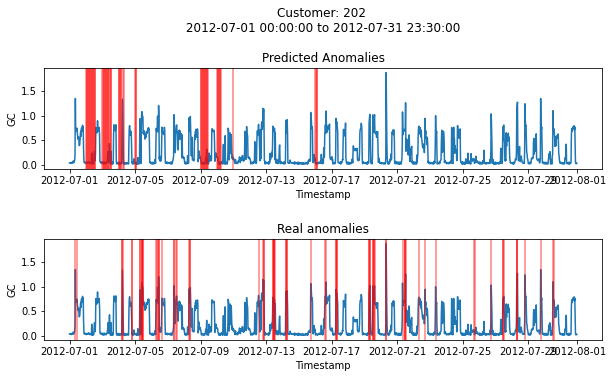

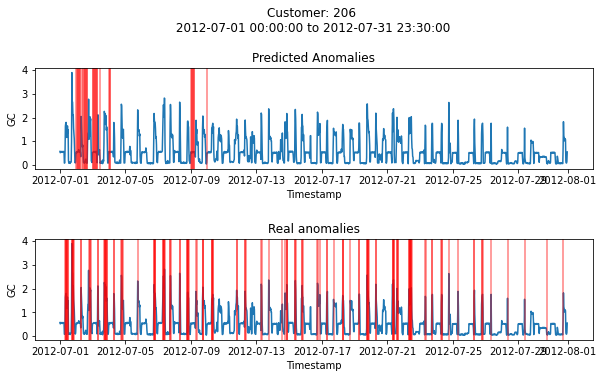

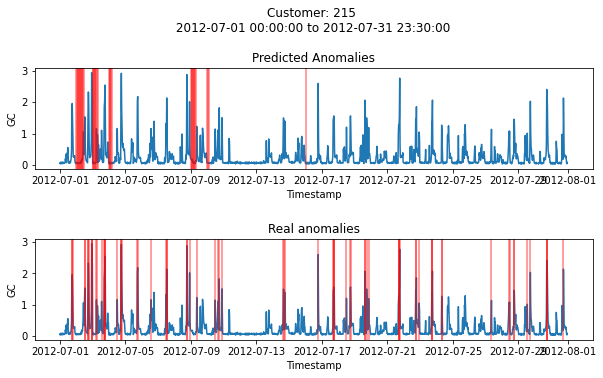

In [38]:
for i, customer in enumerate(test_rows['costumer'].unique()):
    customer_rows = test_rows[test_rows['costumer'] == customer]
    fig = plt.figure(figsize=(10,5))

    plt.subplot(211)
    plt.title(f'Customer: {str(customer)} \n {customer_rows["timestamp"].iloc[0]} to {customer_rows["timestamp"].iloc[-1]} \n\nPredicted Anomalies')
    plt.plot(customer_rows['timestamp'], customer_rows['GC'])
    plt.ylabel('GC')
    plt.xlabel('Timestamp')

    for i, el in enumerate(y_pred[i*len(customer_rows):(i+1)*len(customer_rows)]):
        if el == 1:
            plt.axvline(customer_rows['timestamp'].iloc[i],color='r', alpha=0.5)

    plt.subplot(212, title='Real anomalies')
    plt.plot(customer_rows['timestamp'], customer_rows['GC'])
    plt.ylabel('GC')
    plt.xlabel('Timestamp')
    for i, el in enumerate(y_test.loc[customer_rows.index]):
        if el == 1:
            plt.axvline(customer_rows['timestamp'].iloc[i], color='r', alpha=0.5)

    plt.subplots_adjust(hspace=0.7)
    plt.show()
    fig.savefig(f'customer{customer}_predicted_vs_labeled.png')

In [34]:
def find_hyperparameters():
    df = pd.read_csv(f'{data_path}anomaly_labeled_dataset.csv' ,index_col=0)
    df_one_month = df[df['monthofyear'] == 7]
    df_one_month = df_one_month[df_one_month['year'] == 2012]
    current_dataset = df_one_month

    x_train, x_test, y_train, y_test = train_test_split(current_dataset.loc[:, ~current_dataset.columns.isin(['Anomaly'])], current_dataset.Anomaly, test_size=0.3,shuffle=False)

    #_, y_train, x_test, y_test = load_data()

    learning_rates = [0.01, 0.001]#, 0.0001, 0.00001]
    batch_sizes = [512, 1024] #[128, 256, 512, 1024]
    epochs = [5, 10]#, 15, 50, 100]

    parameters = []
    acc_scores = []
    precisions = []
    recalls = []
    f1s = []

    progress = tqdm(total=len(learning_rates)*len(batch_sizes)*len(epochs))

    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for epoch in epochs:
                progress.update(1)

                lstmgan = LSTMGAN(epochs = epoch, learning_rate=learning_rate)

                discriminator_loss, gan_loss = lstmgan.train(batch_size, epoch)
                y_pred = anomaly_detection(x_test, y_test, batch_size, lstmgan.discriminator)
                acc_score, precision, recall, f1 = evaluation(y_test, y_pred)

                parameters.append((learning_rate, batch_size, epoch))
                acc_scores.append(acc_score)
                precisions.append(precision)
                recalls.append(recall)
                f1s.append(f1)

    max_acc = acc_scores.index(max(acc_scores))
    max_prec = precisions.index(max(precisions))
    max_rec = recalls.index(max(recalls))
    max_f1 = f1s.index(max(f1s))

    print(f'highest accuracy score: {acc_scores[max_acc]}\n\tlearning rate: {parameters[max_acc][0]}\n\tbatch_size: {parameters[max_acc][1]}\n\tepochs: {parameters[max_acc][2]}')
    print(f'\nhighest precision: {precisions[max_prec]}\n\tlearning rate: {parameters[max_prec][0]}\n\tbatch_size: {parameters[max_prec][1]}\n\tepochs: {parameters[max_prec][2]}')
    print(f'\nhighest recall: {recalls[max_rec]}\n\tlearning rate: {parameters[max_rec][0]}\n\tbatch_size: {parameters[max_rec][1]}\n\tepochs: {parameters[max_rec][2]}')
    print(f'\nhighest f1: {f1s[max_f1]}\n\tlearning rate: {parameters[max_f1][0]}\n\tbatch_size: {parameters[max_f1][1]}\n\tepochs: {parameters[max_f1][2]}')
    return parameters, acc_scores, precisions, recalls, f1s

# """Uncomment to run"""
parameters, acc_scores, precisions, recalls, f1s = find_hyperparameters()

  0%|          | 0/8 [00:00<?, ?it/s]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirecti  (None, 8, 512)           528384    
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 8, 512)            0         
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 8, 512)            0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 512)              1574912   
 onal)                                                           
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 512)              

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(f'{data_path}anomaly_labeled_dataset.csv' ,index_col=0)
df.head()

In [ ]:
df = pd.read_csv(f'{data_path}2010-2011 Solar home electricity data.csv', skiprows=1)
df.head()

In [ ]:
import seaborn as sns
sns.displot(df)

In [ ]:
timecols = ['0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00',
            '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
            '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30',
            '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
            '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30',
            '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00']

In [ ]:
customer1 = df[df.Customer==215]
customer1['date'] = pd.to_datetime(customer1['date'])

customer1 = customer1.groupby('date')[timecols].sum()
customer1['sum'] = customer1[timecols].sum(axis=1)
customer1

In [ ]:
plt.bar(customer1['sum'])